Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account. Your solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

In order to work on the above problem, you need to do the following:

a) Define the question, the metric for success, the context, experimental design taken and the appropriateness of the available data to answer the given question
b) Find and deal with outliers, anomalies, and missing data within the dataset.
c) Perform univariate, bivariate and multivariate analysis recording your observations.
d) Implement the solution by performing the respective analysis i.e. factor analysis, principal component analysis, and discriminant analysis.
e) Challenge your solution by providing insights on how you can make improvements.

1. DEFINING THE QUESTION



 a.) Specifying the question

How to predict which individuals are most likely to have or use a bank account. 

Your solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

b.) Defining the metric for success

c.) Understanding the context

d.) Recording the experimental design

e.) Data relevance

2. READING THE DATA

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

data = pd.read_csv('http://bit.ly/FinancialDataset')

3. CHECKING THE DATA

In [3]:
# Determining the no. of records in our dataset #
data.shape

(23524, 13)

In [4]:
# Previewing the top of our dataset #
data.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
# Checking whether each column has an appropriate datatype#
data.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

4. TIDYING THE DATASET

a.) Checking for univariate outliers using box plot


C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='household_size'>

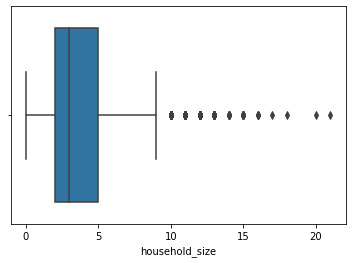

In [6]:
# Outliers for household size factoring in scales of measurement #
sns.boxplot(data['household_size'], orient='h')

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Respondent Age'>

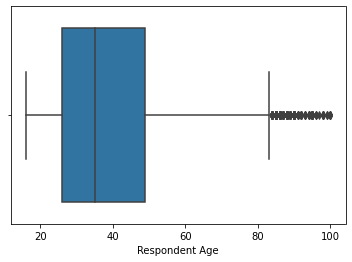

In [7]:
# Outliers for respondent age factoring in scales of measurement #
sns.boxplot(data['Respondent Age'], orient='h')

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year'>

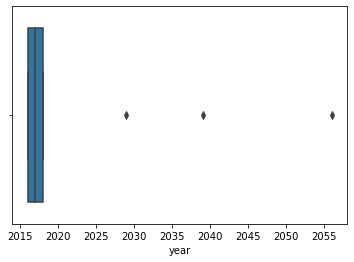

In [8]:
# Outliers for year factoring in scales of measurement #
sns.boxplot(data['year'], orient='h')

b.) Checking for and dealing with missing values in the dataset

In [9]:
data.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [10]:
data1 = data.fillna({'country':'Other',
'Has a Bank account':'Other',
'Type of Location':'Other',
'Cell Phone Access':'Other',
'household_size':0,
'Respondent Age':15,
'gender_of_respondent':'Nonbinary',
'The relathip with head':'Unknown',
'marital_status':'Engaged',
'Level of Educuation':'Other/Dont know/RTA',
'Type of Job':'Dont Know/Refuse to answer'})

In [ ]:
# converting floats to integers
data[]

In [22]:
data1.read()

AttributeError: 'DataFrame' object has no attribute 'read'

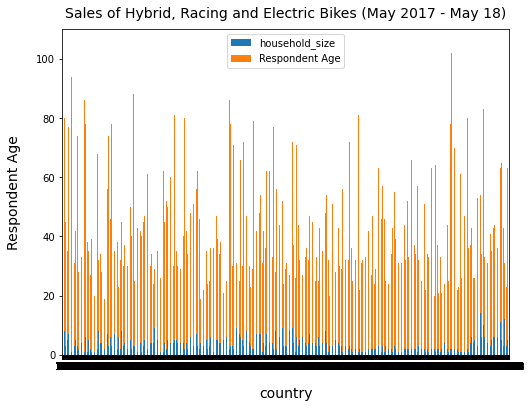

In [20]:
#grouped_country = data1.groupby()
data1[['Has a Bank account','household_size','Respondent Age']].plot(kind='bar', figsize=(8, 6),stacked=True)

# Rotating our x axis ticks
plt.xticks(rotation = 0)

# Giving our chart a title
plt.title("Sales of Hybrid, Racing and Electric Bikes (May 2017 - May 18)", fontsize=14, y=1.015)

# Labeling our y axis
plt.ylabel("Respondent Age", fontsize=14, labelpad=15)

# Labeling our x axis
plt.xlabel("country", fontsize=14, labelpad=15)

# Displaying our chart
plt.show()

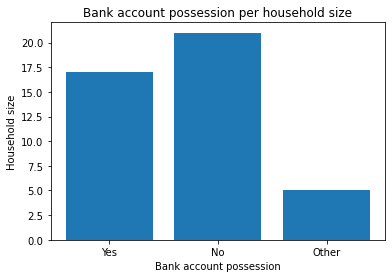

In [12]:
# univariate analysis using bar chart

plt.bar(data1['Has a Bank account'],data1['household_size'])
plt.title('Bank account possession per household size')
plt.xlabel('Bank account possession')
plt.ylabel('Household size')
plt.show()
# Bank account possession is noted in households that are below 17.5 compared to 

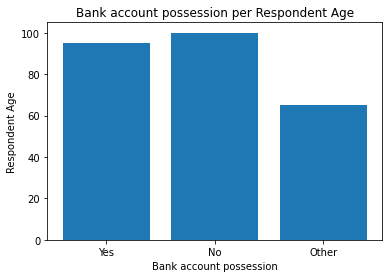

In [21]:
plt.bar(data1['Has a Bank account'],data1['Respondent Age'])
plt.title('Bank account possession per Respondent Age')
plt.xlabel('Bank account possession')
plt.ylabel('Respondent Age')
plt.show()

In [13]:
# univariate analysis
countries = wine_df['country']

plt.hist(countries, bins=10, histtype='bar', rwidth=0.9)
plt.xlabel('No. of Winespoints')
plt.ylabel('Quantity')
plt.title('Histogram of Points of Wine vs No. of Wines')
plt.show()

NameError: name 'wine_df' is not defined

In [ ]:
# univariate analysis
# Assigning our columns to population and age variables
population = df['population']
age        = df['age']

# Plotting our pie chart
# -------
plt.pie(population, labels = age, autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.title('Pie Chart of Age population')
plt.show()

b.) Checking for bivariate outliers using box plot

In [ ]:
data1[['household_size', 'Respondent Age']].plot(kind='bar', figsize=(8, 6),stacked=True)

# Rotating our x axis ticks
plt.xticks(rotation = 0)

# Giving our chart a title
plt.title("Sales of Hybrid, Racing and Electric Bikes (May 2017 - May 18)", fontsize=14, y=1.015)

# Labeling our y axis
plt.ylabel("Respondent Age", fontsize=14, labelpad=15)

# Labeling our x axis
plt.xlabel("country", fontsize=14, labelpad=15)

# Displaying our chart
plt.show()

In [ ]:
data1.head()

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10, 7))
fig.suptitle('Boxplots')
sns.boxplot(data1['year'], ax=ax1)
sns.boxplot(data1['household_size'], ax=ax2)
sns.boxplot(data1['Respondent Age'], ax=ax3)
plt.show()

In [ ]:
data1.head()

In [ ]:
plt.scatter(data1['household_size'],data1['Respondent Age'])
plt.title('household_size vs Respondent Age')
plt.xlabel('Year')
plt.ylabel('Respondent Age')
plt.show()